<a href="https://colab.research.google.com/github/pratikp12/clustering-Hacker-data-solution/blob/main/kmean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering Consulting Project - Solutions

A large technology firm needs your help, they've been hacked! Luckily their forensic engineers have grabbed valuable data about the hacks, including information like session time,locations, wpm typing speed, etc. The forensic engineer relates to you what she has been able to figure out so far, she has been able to grab meta data of each session that the hackers used to connect to their servers. These are the features of the data:

* 'Session_Connection_Time': How long the session lasted in minutes
* 'Bytes Transferred': Number of MB transferred during session
* 'Kali_Trace_Used': Indicates if the hacker was using Kali Linux
* 'Servers_Corrupted': Number of server corrupted during the attack
* 'Pages_Corrupted': Number of pages illegally accessed
* 'Location': Location attack came from (Probably useless because the hackers used VPNs)
* 'WPM_Typing_Speed': Their estimated typing speed based on session logs.


The technology firm has 3 potential hackers that perpetrated the attack. Their certain of the first two hackers but they aren't very sure if the third hacker was involved or not. They have requested your help! Can you help figure out whether or not the third suspect had anything to do with the attacks, or was it just two hackers? It's probably not possible to know for sure, but maybe what you've just learned about Clustering can help!

**One last key fact, the forensic engineer knows that the hackers trade off attacks. Meaning they should each have roughly the same amount of attacks. For example if there were 100 total attacks, then in a 2 hacker situation each should have about 50 hacks, in a three hacker situation each would have about 33 hacks. The engineer believes this is the key element to solving this, but doesn't know how to distinguish this unlabeled data into groups of hackers.**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('hack_data.csv',)
data.head()

,Session_Connection_Time,Bytes Transferred,Kali_Trace_Used,Servers_Corrupted,Pages_Corrupted,Location,WPM_Typing_Speed
0,8.0,391.09,1,2.96,7.0,Slovenia,72.37
1,20.0,720.99,0,3.04,9.0,British Virgin Islands,69.08
2,31.0,356.32,1,3.71,8.0,Tokelau,70.58
3,2.0,228.08,1,2.48,8.0,Bolivia,70.80
4,20.0,408.50,0,3.57,8.0,Iraq,71.28


In [ ]:
data =data.drop('Location',axis=1)
data.columns

Index(['Session_Connection_Time', 'Bytes Transferred', 'Kali_Trace_Used',
       'Servers_Corrupted', 'Pages_Corrupted', 'WPM_Typing_Speed'],
      dtype='object')

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

ct = ColumnTransformer([
        ('somename', StandardScaler(),list(data.columns))
    ], remainder='passthrough')
data=ct.fit_transform(data)
data

array([[-1.56457197, -0.75603359,  0.97632801, -1.00001941, -1.25479003,
         1.12221913],
       [-0.71151736,  0.39783827, -1.02424594, -0.96521347, -0.60096808,
         0.87653121],
       [ 0.07044937, -0.87764658,  0.97632801, -0.67371374, -0.92787905,
         0.98854698],
       ...,
       [ 0.63915245,  0.29021584,  0.97632801,  0.67066562,  0.70667582,
        -1.0897189 ],
       [ 0.42588879,  1.58598701,  0.97632801,  0.43572553,  1.03358679,
        -1.00682724],
       [ 0.8524161 ,  0.42749826, -1.02424594,  1.17100097,  1.03358679,
        -0.90153241]])

In [ ]:
from sklearn.cluster import KMeans

km2 = KMeans(
    n_clusters=2, random_state=0
)

km3 = KMeans(
    n_clusters=3, random_state=0
)
km2pred = km2.fit_predict(data)
km3pred = km3.fit_predict(data)

In [ ]:
print("With K=3")
print("Within Set Sum of Squared Errors = " + str(km3.inertia_))
print('--'*30)
print("With K=2")
print("Within Set Sum of Squared Errors = " + str(km2.inertia_))

With K=3
Within Set Sum of Squared Errors = 435.4530414928181
------------------------------------------------------------
With K=2
Within Set Sum of Squared Errors = 603.5778706408448


Not much to be gained from the WSSSE, after all, we would expect that as K increases, the WSSSE decreases. We could however continue the analysis by seeing the drop from K=3 to K=4 to check if the clustering favors even or odd numbers. This won't be substantial, but its worth a look:

In [ ]:
for k in range(2,9):
    model=KMeans(
    n_clusters=k, random_state=0)
    model.fit(data)
    wssse = model.inertia_
    print("With K={}".format(k))
    print("Within Set Sum of Squared Errors = " + str(wssse))
    print('--'*30)

With K=2
Within Set Sum of Squared Errors = 603.5778706408448
------------------------------------------------------------
With K=3
Within Set Sum of Squared Errors = 435.4530414928181
------------------------------------------------------------
With K=4
Within Set Sum of Squared Errors = 267.9358147268938
------------------------------------------------------------
With K=5
Within Set Sum of Squared Errors = 246.10104477285415
------------------------------------------------------------
With K=6
Within Set Sum of Squared Errors = 226.770800339213
------------------------------------------------------------
With K=7
Within Set Sum of Squared Errors = 206.16963748174751
------------------------------------------------------------
With K=8
Within Set Sum of Squared Errors = 191.05736189974053
------------------------------------------------------------


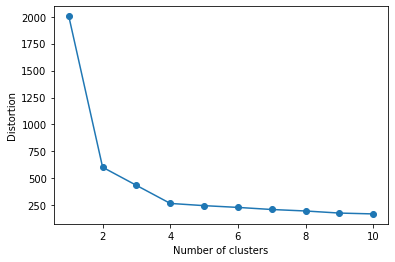

In [ ]:

# calculate distortion for a range of number of cluster
distortions = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(data)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

**Nothing definitive can be said with the above, but wait! The last key fact that the engineer mentioned was that the attacks should be evenly numbered between the hackers! Let's check with the transform and prediction columns that result form this! Congratulations if you made this connection, it was quite tricky given what we've covered!**

In [ ]:

unique, counts = np.unique(km2pred, return_counts=True)
print(np.asarray((unique, counts)).T)

[[  0 167]
 [  1 167]]


In [ ]:

unique, counts = np.unique(km3pred, return_counts=True)
print(np.asarray((unique, counts)).T)

[[  0 167]
 [  1  83]
 [  2  84]]


### Bingo! It was 2 hackers, in fact, our clustering algorithm created two equally sized clusters with K=2, no way that is a coincidence!

# Great Job!